[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW5.ipynb)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
import pandas as pd

In [13]:
data = load_linnerud()
features = pd.DataFrame(data.data, columns=data.feature_names)
targets = pd.DataFrame(data.target, columns=data.target_names)
linnerud = pd.concat([features, targets], axis=1)

**Problem 1**: In class when we used the linnerud data, we assumed that Weight was the target variable and Chins was the predictor. For this problem use Pulse as the target variable and Situps as the predictor.

Part a. Make a scatterplot of Pulse versus Situps.

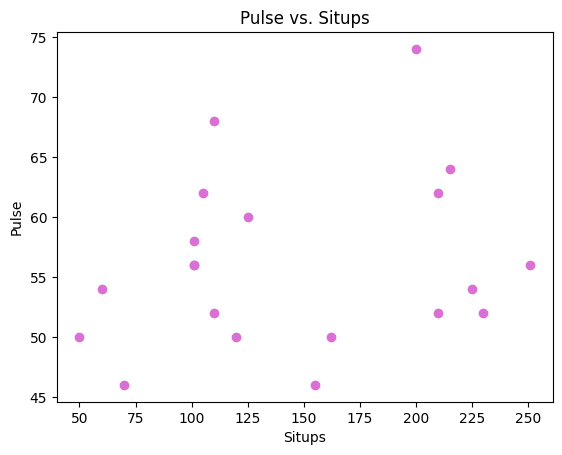

In [14]:
plt.scatter(linnerud['Situps'], linnerud['Pulse'], color='orchid')
plt.xlabel('Situps')
plt.ylabel('Pulse')
plt.title('Pulse vs. Situps')
plt.show()

Part b. Fit a simple linear regression model to the data using Situps as a predictor and Pulse as the target.

In [16]:
from scipy.stats import linregress

# Fit a regression line
result = linregress(linnerud['Situps'], linnerud['Pulse'])

Part c. What are the estimated slope and intercept of the model?

In [18]:
slope = result.slope
intercept = result.intercept

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.025934109962831214
Intercept: 52.32529029490992


Part d. Make a new plot of the data with the regression line plotted on top of it.

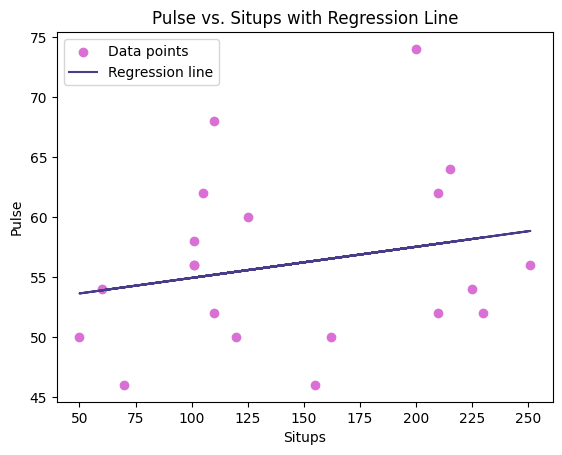

In [19]:
import numpy as np
plt.scatter(linnerud['Situps'], linnerud['Pulse'], color='orchid', label='Data points')


x_vals = np.array(linnerud['Situps'])

y_vals = slope * x_vals + intercept


plt.plot(x_vals, y_vals, color='darkslateblue', label='Regression line')

plt.xlabel('Situps')
plt.ylabel('Pulse')
plt.title('Pulse vs. Situps with Regression Line')
plt.legend()
plt.show()

**Problem 2**: Consider modeling $Y$ as a function of $X$ using linear regression in two different contexts. (A) $Y$ follows a normal distribution with mean $\beta_0 + \beta_1 X$ and variance $\sigma^2$ and (B) the regression line that minimizes the target function $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$.

Part a. What is the difference between the estimates for $\beta_0$ and $\beta_1$ when using maximum likelihood estimation for (A) and target function minimization for (B).

There won't be any differnece between the estimates for B0 and B1 using the two methods. They both give us the same regression line for the inercept and slope. Whichever method you use you should get the same values for B0 and B1.

Part b. What is the difference in the estimate for $\sigma$ between the two methods?

The 𝜎  will be a little smaller for the MLE estimate because you divide by n instead of n-2 in the function. That is the one differnece between the two.

**Problem 3** : Use the code in the following chunk to import the car stopping data set into your python environment. This data set has two variables. The variable speed is the speed a car is going and dist is the distance the car traveled before stopping. Use speed as a predictor and dist as a target variable for the following questions.

In [22]:
%pip install pydataset
from pydataset import data
cars = data("cars")
x = cars[['speed']]
y = cars['dist']

Part a. Build a decision tree with a maximum depth of 2. Plot the tree.

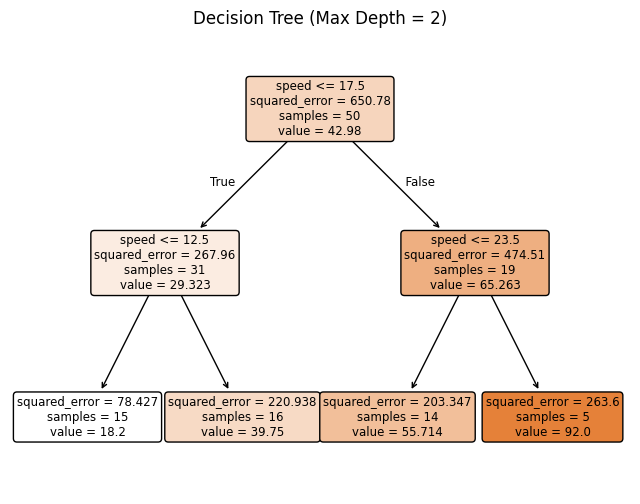

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(x, y)

plt.figure(figsize=(8,6))
plot_tree(tree, feature_names=['speed'], filled=True, rounded=True)
plt.title("Decision Tree (Max Depth = 2)")
plt.show()

Part b. What is the split point for the first split in the decision tree?

The split point is 17.5. In the first box, you can see that the decision is made witht the condition speed<= 17.5.

Part c. How many data points end up in each leaf node of the decision tree.

The four leaf nodes ended up with 15, 16, ,14 and 5 data points respectively.

Part. d. Using the decision tree model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

According to the tree it would be 39.75.

**Problem 4**: Test a few other models for the car data set.

Part a. Build the decision tree with a maximum depth of 3 instead of 2. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

In [26]:
tree3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree3.fit(x, y)

pred_15_tree3 = tree3.predict([[15]])
print("Estimated stopping distance at speed 15 (tree depth=3):", pred_15_tree3[0])

Estimated stopping distance at speed 15 (tree depth=3): 36.75


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Part b. Fit a linear regression model to this data. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

pred_15_lr = model.predict([[15]])
print("Estimated stopping distance at speed 15 (linear regression):", pred_15_lr[0])

Estimated stopping distance at speed 15 (linear regression): 41.407036496350365


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Problem 5**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Build a linear regression model for revenue using the other variables as predictors.

In [32]:
url = 'https://richardson.byu.edu/220/revenue_data.csv'
data = pd.read_csv(url)

X = data[['AdSpend', 'AvgTraffic', 'DiscountRate']]
y = data['MonthlyRevenue']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients (AdSpend, AvgTraffic, DiscountRate):", model.coef_)

Intercept: 45.95203923717712
Coefficients (AdSpend, AvgTraffic, DiscountRate): [ 3.19910204  0.00390189 -0.41182189]


Part b. Interpret the coefficient for AdSpend in the context of the problem.

In the context of this problem AdSpend is how much money has been spent on advertising. From this coefficient measure we can see that the revune goes up about 3.19$ for every dollar spent on advertizing. This means that the advertisements are creating value and doing super well for the company.